#Домашнє завдання 3

###Опис завдання


Завдання реалізуються у Google Colab у блоках коду, а коментарі та висновки додаються у Markdown блоках. Потрібно виконати наступні дії.

 1. Завантажити набір даних Boston за допомогою функції get_data() з бібліотеки pycaret. Для інсталяції бібліотеки слід застосувати команду

```
!pip install pycaret[full]
```

 2. Додати короткий опис суті набору даних та сенсу ознак.

 3. Вивести загальну інформацію про стовпці даних (ознаки) та їх типи. Для цього потрібно застосувати метод info()

 4. Вивести основні статистичні міри розсіяння та середнього. Для цього потрібно застосувати метод discribe().

 5. Побудувати діаграму гістограму за числовими ознаками. Використовуючи функцію hist. Оцінити особливості розподілу наявні в деяких ознаках.

 6. Побудувати діаграми boxplot для кожної ознаки (https://uk.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D0%BE%D0%B1%D0%BA%D0%BE%D0%B2%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D1%84%D1%96%D0%BA). Оцінити наявність викідів. Для цього використовуйте правило міжквантильного діапазону (IQR)

 8. Обробити викиди використовуючи функцію під назвою Winsorization (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html). Оцінити наявність викідів після цієї процедури.

 9. Побудувати кореляційну матрицю набору даних. Для цього використати метод corr() бібліотеки Pandas.

 10. Візуалізувати отриману кореляційну матрицю засобами функції heatmap() бібліотеки seaborn.

 11. Виконати розділення набору даних для частини тренування та тестування. Для цього використовується функцію train_test_split() з біблітеки sklearn.

 12. Створити регресор на основі дерев розв'язків. Для цього використовується функція  DecisionTreeRegressor() з бібліотеки sklearn.

 5. Використати функцію cross_val_test() з конспекту для порівняння ефективності роботи класифікатора на даних для тестування та тренування у випадку використання крос-валідації.

 6. Візуалізувати отримане дерево розв'язку за допомогою функції plot_tree() модуля tree бібліотеки sklearn.

 7. Візуалізувати границю прийняття рішення за допомогою функції DecisionBoundaryDisplay() бібліотеки sklearn.

 8. Оцінити точність класифікатора за допомогою функції cross_val_test().  


 9. Оцінити важливість ознак набору даних в задачі регресії. Для цього використовується властивість feature_importances_ побудованого регресора.

 10. Провести декілька обчислювальних екпериментів та  оціни оптимальний набір гіперпараметрів за результатами експериментів.



**Пiдказки**

Для виконання завдання використовуйте функції бібліотек pandas, seaborn, sklearn.




**Критерії виконанного завдання**

- Створено Google Colab, в якому виконанi усі зазначені етапи.
- До Google Colab додані висновки.

###Розв'язок

In [1]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 783.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 83.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.4 MB/s eta 0:00:00
  Preparing m

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import f1_score


def cross_val_test(model, dataX, dataY, model_type='regression', n_cv=5):

    # Розбиття для подальшої крос-валідації
    cv = KFold(n_splits=n_cv, shuffle=True)
    # Визначення набору метрик
    if model_type == 'regression':
        scorer = {'r2':make_scorer(r2_score),
                'mae': make_scorer(mean_absolute_error),
                'mse': make_scorer(mean_squared_error),
                'mape': make_scorer(mean_absolute_percentage_error)}
    if model_type == 'classification':
        scorer = {'f1':make_scorer(f1_score, average='micro'),
          }


    # Оцінка якості моделі на різних наборах даних
    scores = cross_validate(model, dataX, dataY, scoring=scorer, cv=cv, return_train_score=True)
    return scores

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt

import math
from pycaret.datasets import get_data
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns

Завантажити набір даних Boston за допомогою функції get_data() з бібліотеки pycaret. Для інсталяції бібліотеки слід застосувати команду

In [3]:
### START CODE HERE ###

df = get_data('boston')

### END CODE HERE ###



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Набір даних Boston Housing присвячено прогнозуванню середньої вартості будинків у різних районах Бостона на основі різних характеристик (ознак). Він містить 506 спостережень (районів) та 13 ознак, які описують соціально-економічні та екологічні фактори.



Набір даних Boston присвячено ...

1. ZN: Відсоток земельних ділянок понад 25 000 квадратних футів, призначених для житлової забудови.
2. INDUS: Відсоток нежитлових площ на місто (промислові зони).
3. CHAS: Фіктивна змінна (0 або 1), що показує, чи знаходиться район поблизу річки Чарльз (1 – так, 0 – ні).
4. NOX: Концентрація оксидів азоту (повітряне забруднення, в частках на мільйон).
5. RM: Середня кількість кімнат у будинку.
6. AGE: Відсоток будинків, побудованих до 1940 року.
7. DIS: Відстань до п'яти основних ділових центрів Бостона.
8. RAD: Індекс доступу до радіальних магістралей (інфраструктурний фактор).
9. TAX: Ставка податку на нерухомість (у доларах на 10 000 доларів вартості будинку).
10. PTRATIO: Співвідношення кількості учнів до вчителів у школах району.
11. B: Пропорція афроамериканського населення району за формулою: 1000(Bk - 0.63)^2, де Bk – частка афроамериканців у районі.
12. LSTAT: Відсоток малозабезпечених сімей у районі.
13. MEDV: Цільова змінна: медіанна вартість житла в районі (в тисячах доларів).




Описовий аналіз даних

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.isnull().sum().sort_values(ascending = False)

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Histograms



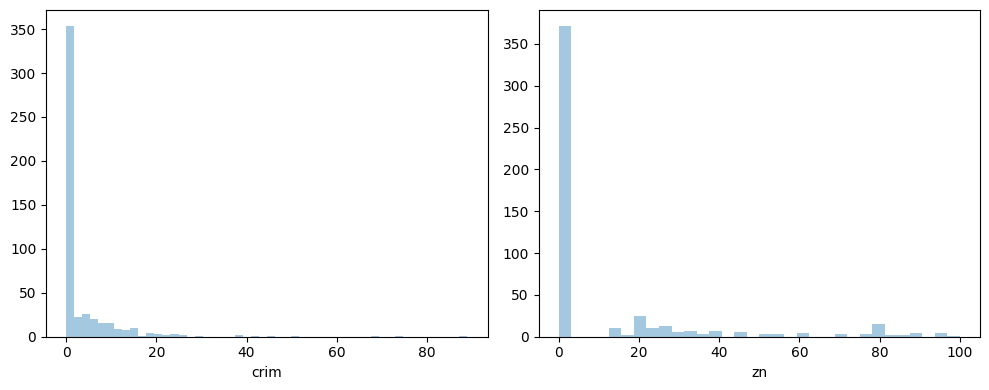

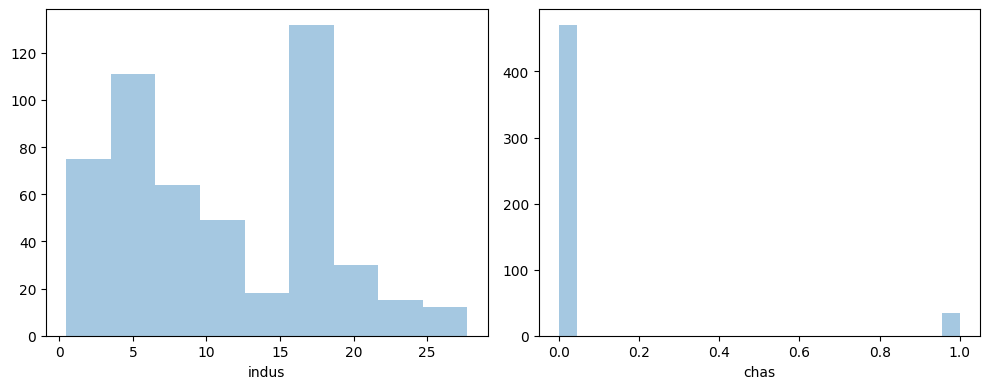

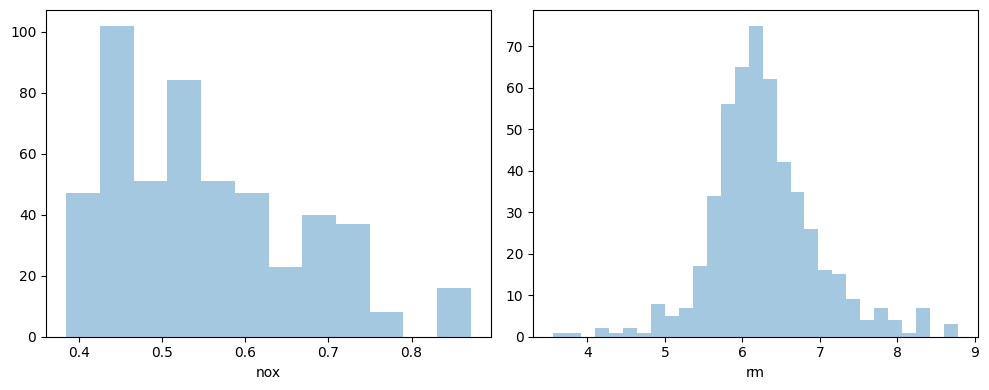

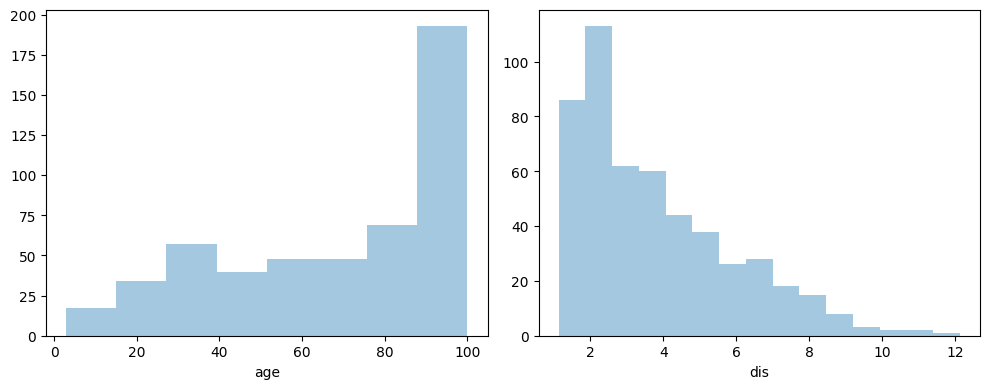

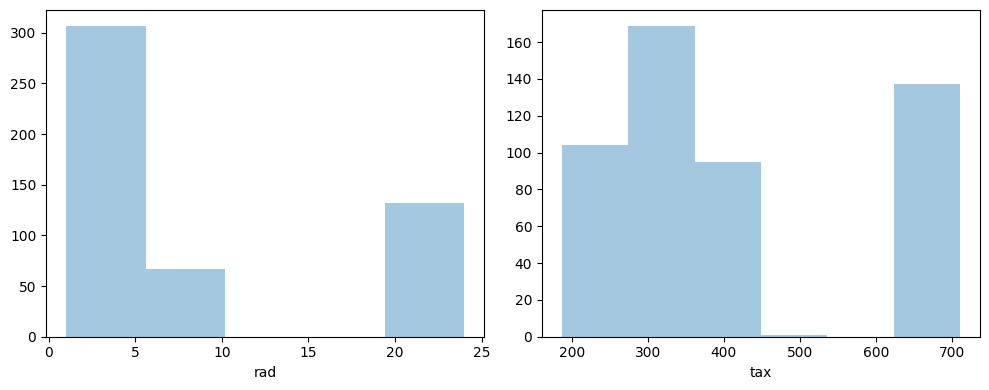

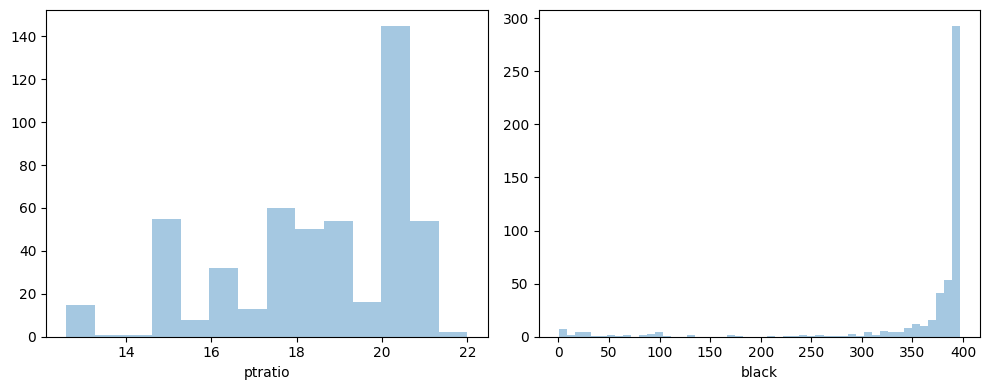

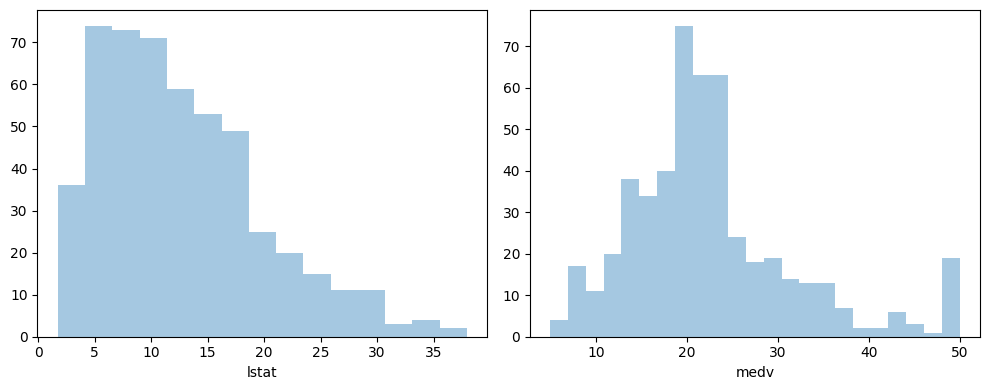


Box Plots



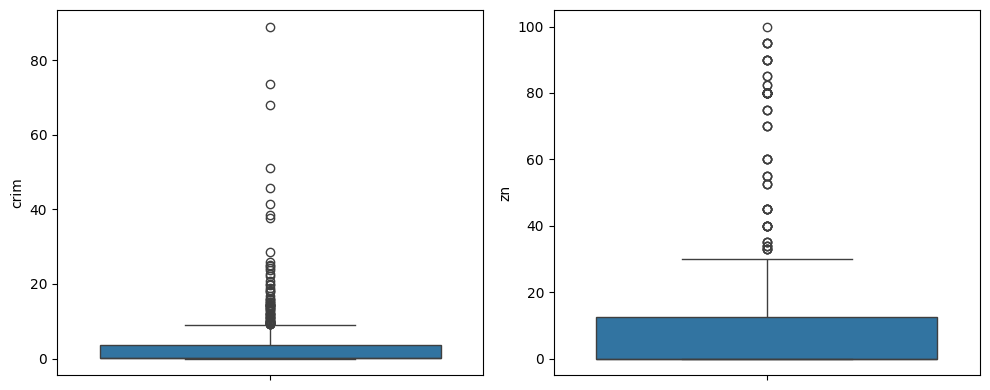

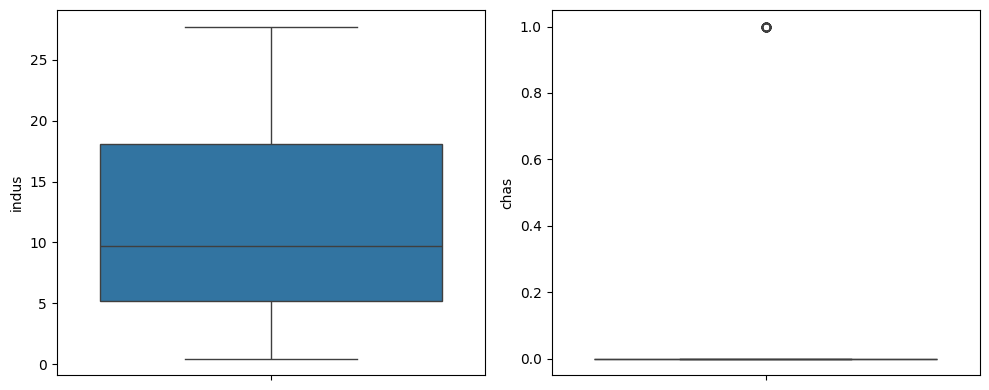

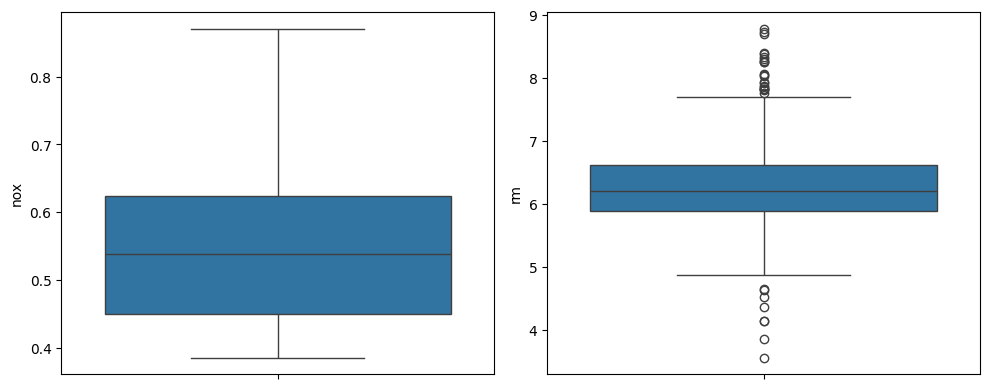

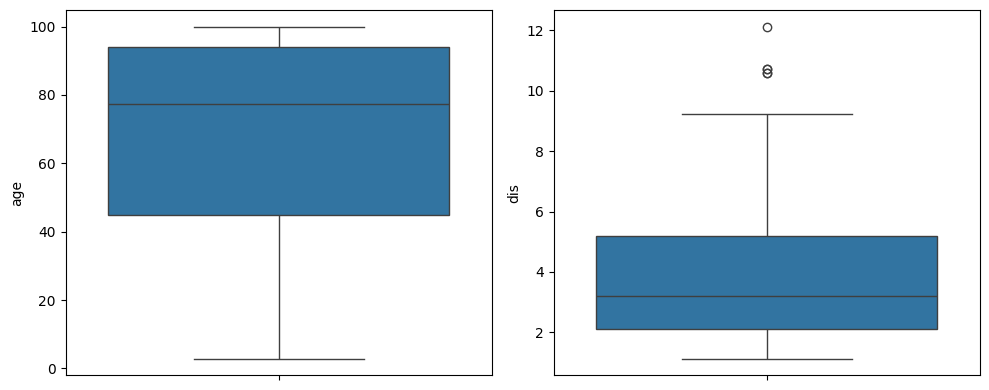

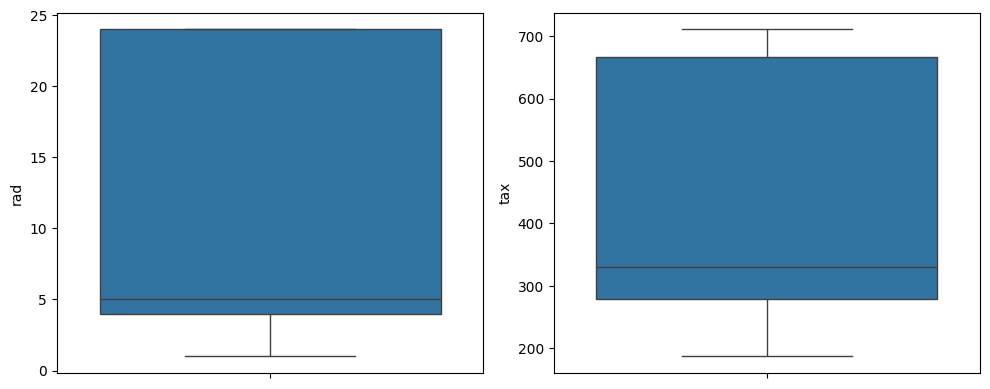

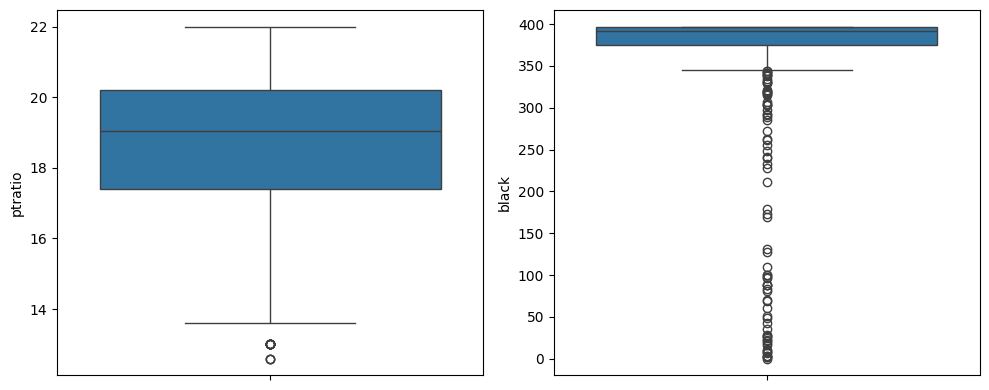

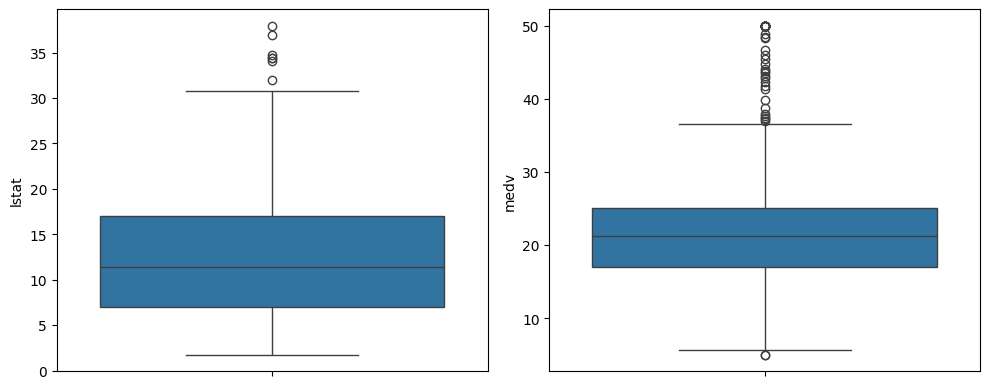

In [7]:
# Function to plot histograms
def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]

    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)

# Function to plot boxplots
def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]

    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])



print("Histograms\n")
plot_continuous_columns(df)

print("===="*30)
print('\nBox Plots\n')
plot_box_plots(df)

Спостереження:

* Ознаки CRIM, ZN, B і MEDV сильно перекошені. Це пов’язано з наявністю викидів у наборі даних.
* Оскільки ознаки CHAS складаються здебільшого лише з одного значення, їх дисперсія є значно меншою, тому ми можемо відмовитися від них, оскільки технічно це не допоможе у прогнозуванні.

In [8]:
df.drop(['chas'], axis=1, inplace=True)


In [9]:
df.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Визначення числових та категорійних ознак

In [14]:
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()

numeric_columns = numeric_features(df)
print("Numerical Features:")
print(numeric_columns)

print("===="*20)



def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()

categorical_columns = categorical_features(df)
print("Categorical Features:")
print(categorical_columns)

print("===="*20)




def check_datatypes(dataset):
    return dataset.dtypes

print("Datatypes of all the columns:")
check_datatypes(df)


Numerical Features:
      crim    zn  indus    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
Categorical Features:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
Datatypes of all the columns:


,0
crim,float64
zn,float64
indus,float64
nox,float64
rm,float64
age,float64
dis,float64
rad,int64
tax,int64
ptratio,float64


Викиди в стовпцях з неперервними числовими даними

Викиди – це спостереження, які лежать далеко від більшості спостережень у наборі даних і можуть бути представлені математично різними способами.

Одним із методів визначення викидів є: викиди – це точки даних, що лежать за межами (третій квартиль + 1,5xIQR) і нижче (перший квартиль – 1,5xIQR).

Наведена нижче функція приймає фрейм даних і виводить кількість викидів у кожній числовій функції на основі наведеного вище правила IQR


In [11]:
def detect_outliers(df):
    outliers_list = []

    for column in df.select_dtypes(include=np.number).columns:
        q1 = df[column].quantile(0.25)  # 25-й квартиль
        q3 = df[column].quantile(0.75)  # 75-й квартиль
        iqr = q3 - q1  # Інтерквартильний розмах
        fence_low = q1 - 1.5 * iqr  # Нижня межа
        fence_high = q3 + 1.5 * iqr  # Верхня межа

        num_outliers = df[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]

        # Додаємо результат до списку
        outliers_list.append({'Feature': column, 'Number of Outliers': num_outliers})

    # Перетворюємо список у DataFrame
    return pd.DataFrame(outliers_list)

# Виклик функції для аналізу викидів
detect_outliers(df)

,Feature,Number of Outliers
0,crim,66
1,zn,68
2,indus,0
3,nox,0
4,rm,30
5,age,0
6,dis,5
7,rad,0
8,tax,0
9,ptratio,15


**Обробка викидів у стовпцях дійсних числових значень**

Викиди можна обробляти різними способами. Це залежить від асиметрії ознаки.

Щоб зменшити праву асимметрию, використовуються функції обчислення коренів, або логарифми, або зворотні величини відповідних ознак.

Щоб зменшити асиметрію ліворуч, застосовують до відповідної ознаки квадрати чи куби чи вищі ступені.

Але в наших даних деякі ознаки мають від’ємні значення, а також значення 0. У таких випадках не можна використовувати перетворення квадратного кореня або логарифмічне перетворення, оскільки ми не можемо отримати квадратний корінь з від’ємних значень, а нульовий логарифм не визначено.

Тому для цих даних ми використовуємо метод під назвою Winsorization (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html). У цьому методі ми визначаємо довірчий інтервал, скажімо, 90%, а потім замінюємо всі викиди нижче 5-го процентиля значенням 5-го процентиля, а всі значення вище 95-го процентиля значенням 95-го процентиля. Це дуже корисно, коли в об’єктах є від’ємні значення та нулі, які не можна обробити за допомогою логарифмічних перетворень або квадратних коренів.
Давайте напишемо функцію нижче, яка обробляє всі викиди в числових функціях за допомогою Winsorization.

In [15]:
from scipy.stats.mstats import winsorize

def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))

    return dataframe


df = treat_outliers(df)

detect_outliers(df)

,Feature,Number of Outliers
0,crim,66
1,zn,68
2,indus,0
3,nox,0
4,rm,0
5,age,0
6,dis,0
7,rad,0
8,tax,0
9,ptratio,0


Ми бачимо, що викиди видалені. Викиди, показані вище, у стовпцях CRIM, ZN і B насправді не є викидами. Це більшість значень у нашому наборі даних.

Кореляційна матриця

<Axes: >

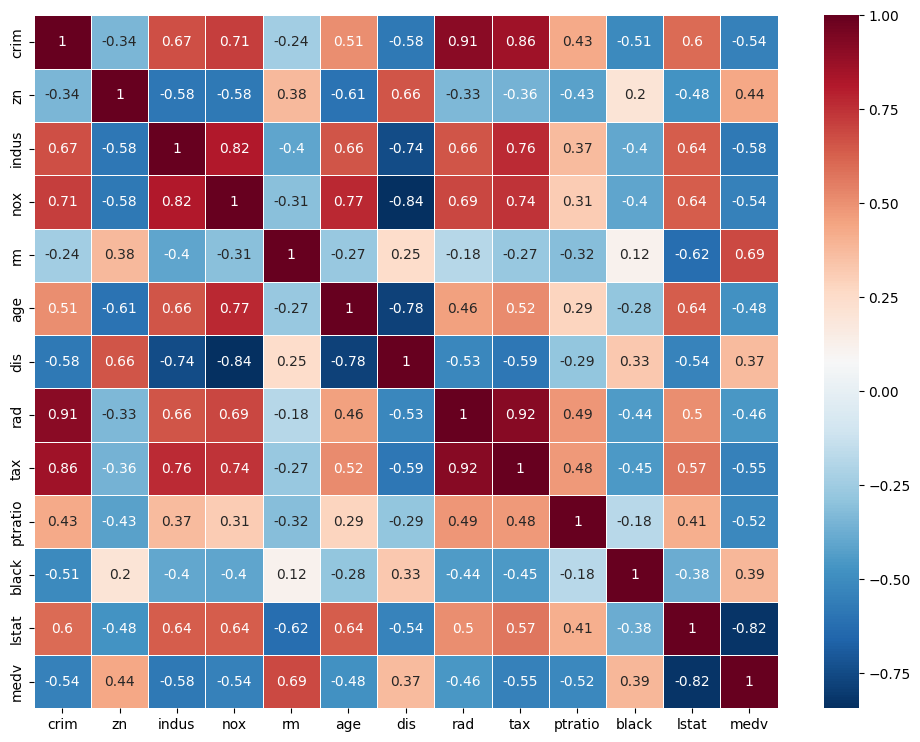

In [16]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,
            xticklabels=corrmat.columns,
            yticklabels=corrmat.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [17]:
X = df.drop('medv',axis=1)
y = df['medv']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True)

In [19]:
X_train.shape, X_test.shape

((354, 12), (152, 12))

In [20]:
dtr = DecisionTreeRegressor(max_depth= 3,random_state= 1)
dtr.fit(X_train ,y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [21]:
predicted_price= pd.DataFrame(dtr.predict(X_test), columns=['Predicted Price'])
actual_price = pd.DataFrame(y_test, columns=['medv'])
actual_price = actual_price.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actual_price,predicted_price],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,151
medv,34.900,31.200,20.70000,11.9,34.900,30.100,18.000000,20.400000,22.600000,20.500000,...,14.900000,16.100000,18.900000,33.400,31.700,20.500000,20.600000,26.600,11.700000,10.200000
Predicted Price,33.378,33.378,22.58871,23.7,33.378,33.378,17.406154,20.215873,20.215873,17.406154,...,12.696552,20.215873,20.215873,33.378,33.378,20.215873,20.215873,33.378,12.696552,12.696552


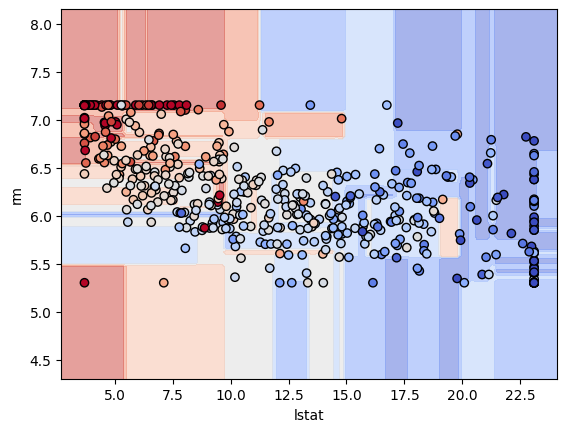

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import DecisionBoundaryDisplay
X_reg = df[['lstat', 'rm']]



# Creating and fitting the tree classifier
regressor = DecisionTreeRegressor(max_depth=10,
                                    random_state=42).fit(X_reg, y)

# Plotting the tree boundaries
disp = DecisionBoundaryDisplay.from_estimator(regressor,
                                              X_reg,
                                              response_method="predict",
                                              xlabel='lstat', ylabel='rm',
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)

# Plotting the data points
disp.ax_.scatter(df['lstat'], df['rm'],
                 c=df['medv'], edgecolor="k",
                 cmap=plt.cm.coolwarm)

# plt.title(f"Decision surface for tree trained on {data.feature_names[0]} and {data.feature_names[1]}
# ")
plt.show()

In [23]:
cross_val_test(regressor, X, y)

{'fit_time': array([0.00841641, 0.00619936, 0.00579214, 0.00606441, 0.00590444]),
 'score_time': array([0.00359535, 0.00346279, 0.00318074, 0.00334287, 0.00315404]),
 'test_r2': array([0.629084  , 0.76088998, 0.80371592, 0.68875538, 0.80174054]),
 'train_r2': array([0.98990838, 0.99192263, 0.98670614, 0.99114409, 0.99317656]),
 'test_mae': array([2.89744868, 2.56176135, 2.13763645, 2.58865158, 2.30784507]),
 'train_mae': array([0.35241006, 0.30292142, 0.42888041, 0.33077014, 0.26628685]),
 'test_mse': array([15.62144917, 12.89080124,  8.80977671, 16.69176404, 10.47061768]),
 'train_mse': array([0.51925923, 0.39303552, 0.67754737, 0.43067859, 0.33409122]),
 'test_mape': array([0.14071666, 0.12706549, 0.10950598, 0.13283533, 0.12253151]),
 'train_mape': array([0.0171961 , 0.01506028, 0.02115389, 0.01718803, 0.01316461])}

Feature: 0, Score: 0.04918
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.13066
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.02329
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.79688


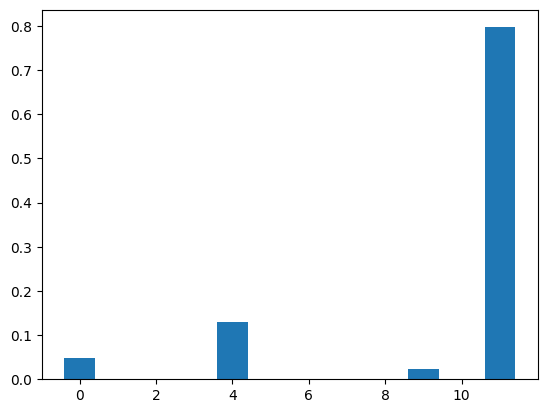

In [24]:
# get importance
importance = dtr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

* Переваги:
Модель дуже точна на тренувальних даних (train_r2 ≈ 0.99).
Швидке навчання (fit_time ≈ 0.006 сек).
* Недоліки :
Overfitting (переобучення) → модель надто добре підлаштувалася під тренувальні дані, але не завжди добре працює на тестових (test_r2 змінюється від 0.62 до 0.80).
Високі похибки на тестових даних (test_mae ≈ 2.5, test_mse ≈ 10-16), що означає, що модель не ідеально передбачає нові дані.



